In [188]:
import pandas as pd
import numpy as np
import nltk
import re
import string


In [189]:
# !pip install emoji
# !pip install tweet-preprocessor

In [190]:
import emoji
import preprocessor as p

In [191]:
from nltk.tokenize import TweetTokenizer

In [192]:
# !pip install openpyxl

In [193]:
g_files = ["/Users/gowri/Desktop/SI630/project/@grinqotts_user_tweets.xlsx", "/Users/gowri/Desktop/SI630/project/@JFroGryffindor_user_tweets.xlsx",
          "/Users/gowri/Desktop/SI630/project/@GryffindorJenny_user_tweets.xlsx"]
g = []
for file in g_files:
    g.append(pd.read_excel(file,engine='openpyxl'))
    
g_df = pd.concat(g, ignore_index=True)
g_df = g_df[["Text"]]
g_df["House"] = "Gryffindor"
len(g_df)

8786

In [194]:
h_files = ["/Users/gowri/Desktop/SI630/project/@HannahNMadzinga_user_tweets.xlsx", "/Users/gowri/Desktop/SI630/project/@HisHufflepuff_user_tweets.xlsx",
          "/Users/gowri/Desktop/SI630/project/@starpotter90_user_tweets.xlsx"]
h = []
for file in h_files:
    h.append(pd.read_excel(file,engine='openpyxl'))
    
h_df = pd.concat(h, ignore_index=True)
h_df = h_df[["Text"]]
h_df["House"] = "Hufflepuff"
len(h_df)

9271

In [195]:
s_files = ["/Users/gowri/Desktop/SI630/project/@DracoMSlytherin_user_tweets.xlsx", "/Users/gowri/Desktop/SI630/project/@_ohkaykaykaaaay_user_tweets.xlsx",
          "/Users/gowri/Desktop/SI630/project/@SacredSlytherin_user_tweets.xlsx"]
s = []
for file in s_files:
    s.append(pd.read_excel(file,engine='openpyxl'))
    
s_df = pd.concat(s, ignore_index=True)
s_df = s_df[["Text"]]
s_df["House"] = "Slytherin"
s_df.head(5)
len(s_df)

9462

In [196]:
r_files = ["/Users/gowri/Desktop/SI630/project/@ravenclaw0044_user_tweets.xlsx", "/Users/gowri/Desktop/SI630/project/@softuch25_user_tweets.xlsx",
          "/Users/gowri/Desktop/SI630/project/@hogwartsIife_user_tweets.xlsx"]
r = []
for file in r_files:
    r.append(pd.read_excel(file, engine='openpyxl'))
    
r_df = pd.concat(r, ignore_index=True)
r_df = r_df[["Text"]]
r_df["House"] = "Ravenclaw"
len(r_df)

9576

In [197]:
df = pd.concat([g_df,r_df,s_df,h_df])
df.sample(10)

,Text,House
3818,I wish I could just turn off my attraction to men,Slytherin
1075,"*Draco nodded and took @DMalfoysFlower's hand,...",Slytherin
5446,@ArdentResister Thank you 💜,Ravenclaw
3266,@BadJewishBoy Pesach?,Ravenclaw
1293,I hate when twitter randomly unfollows ppl.,Ravenclaw
8210,@stargleek1 Fingers crossed I'm going to the H...,Hufflepuff
5133,"I'm listening to ""Sail"" by AWOLNATION on Pando...",Gryffindor
2741,"-- be gentle to her, and Draco understood it. ...",Slytherin
1731,*Draco gently stroked his hand over @DMalfoysF...,Slytherin
5641,RT @CassidyLWright : Y’all voting for Tr*mp be...,Slytherin


In [198]:
df.shape

(37095, 2)

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='House', ylabel='Count'>

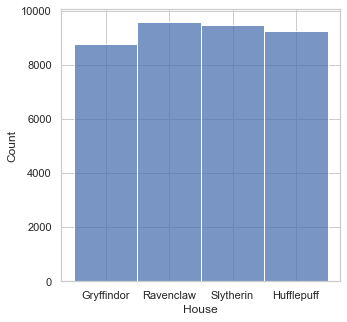

In [200]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(df, x="House",ax=ax)

In [201]:
df.describe

<bound method NDFrame.describe of                                                    Text       House
0     @illicitghosts @extendedhanleia @thorxraqnarok...  Gryffindor
1                                  @joeypqcey lana lang  Gryffindor
2     RT @buttrbeer : reminder that bi/pan lesbians ...  Gryffindor
3                               @oswinpxnd SO true sara  Gryffindor
4                layouts - 2021 https://t.co/lO6E1n8sYc  Gryffindor
...                                                 ...         ...
9266  @iamsilvercloud just a little bit http://t.co/...  Hufflepuff
9267  @iamsilvercloud I watched it when I got home f...  Hufflepuff
9268  @iamsilvercloud he is trying to be will its funny  Hufflepuff
9269  @iamsilvercloud I love it I have watched 3 tim...  Hufflepuff
9270  @iamsilvercloud yeah I'm good http://t.co/jk5h...  Hufflepuff

[37095 rows x 2 columns]>

In [202]:
df['Text']

0       @illicitghosts @extendedhanleia @thorxraqnarok...
1                                    @joeypqcey lana lang
2       RT @buttrbeer : reminder that bi/pan lesbians ...
3                                 @oswinpxnd SO true sara
4                  layouts - 2021 https://t.co/lO6E1n8sYc
                              ...                        
9266    @iamsilvercloud just a little bit http://t.co/...
9267    @iamsilvercloud I watched it when I got home f...
9268    @iamsilvercloud he is trying to be will its funny
9269    @iamsilvercloud I love it I have watched 3 tim...
9270    @iamsilvercloud yeah I'm good http://t.co/jk5h...
Name: Text, Length: 37095, dtype: object

In [203]:
p.set_options(p.OPT.URL, p.OPT.MENTION,p.OPT.NUMBER)

In [204]:
df['Text'] = df['Text'].apply(p.clean)
df['Text']

0                    tried to unf but they deactivated 💀💀
1                                               lana lang
2       RT : reminder that bi/pan lesbians do not exis...
3                                            SO true sara
4                                               layouts -
                              ...                        
9266                                    just a little bit
9267    I watched it when I got home from work I think...
9268                    he is trying to be will its funny
9269    I love it I have watched times today I found a...
9270                                        yeah I'm good
Name: Text, Length: 37095, dtype: object

In [205]:
df['Text'] = df['Text'].apply(lambda x: re.sub('RT',"",x))

In [206]:
df['Text'] = df['Text'].apply(emoji.demojize)

In [207]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [208]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase.lower()


In [209]:
df['Text'] = df['Text'].apply(decontracted)

In [210]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        if punctuation != "_" :
            text = text.replace(punctuation, ' ')
    return text

In [211]:
df['Text'] = df['Text'] .apply(remove_punctuations)

In [212]:
# tt = TweetTokenizer()
# df['Text'] = df['Text'].apply(tt.tokenize)

In [213]:
# df['Text'] = df['Text'].apply(lambda x: [item for item in x if item not in stop_words])

In [214]:
 df['Text']

0        tried to unf but they deactivated  skull  skull 
1                                               lana lang
2          reminder that bi pan lesbians do not exist ...
3                                            so true sara
4                                               layouts  
                              ...                        
9266                                    just a little bit
9267    i watched it when i got home from work i think...
9268                    he is trying to be will its funny
9269    i love it i have watched times today i found a...
9270                                       yeah i am good
Name: Text, Length: 37095, dtype: object

In [380]:
# df_small = pd.concat([g_df[:2500],r_df[:2500],s_df[:2500],h_df[:2500]])
# df_small.sample(10)
df_small = df.groupby('House',as_index=False).apply(lambda s: s.sample(3500))
df_small.sample(10)

Text       House  label
2 1052                             awww i love that mug     Ravenclaw      1
1 3925  only time i’ll say this  i’m so glad kenny is ...  Hufflepuff      3
  1297     we are recruiting interns for our crime pre...  Hufflepuff      3
2 5037  i appreciate your words and concern but i was ...   Ravenclaw      1
  7266        this is the funniest thing i have ever seen   Ravenclaw      1
3 2399   draco nodded in agreement with   she had to e...   Slytherin      2
  2226   draco is eyes looked into  is eyes and he not...   Slytherin      2
1 220      the sindi dining hexagon table   woodiessha...  Hufflepuff      3
  2058     good deeds bulawayo lets show some love  he...  Hufflepuff      3
2 5441  if you are on the fence about president biden ...   Ravenclaw      1

In [381]:
df_small.groupby(['House', 'label']).count()

,,Text
House,label,
Gryffindor,0,3500
Hufflepuff,3,3500
Ravenclaw,1,3500
Slytherin,2,3500


In [382]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [383]:
possible_labels = df.House.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Gryffindor': 0, 'Ravenclaw': 1, 'Slytherin': 2, 'Hufflepuff': 3}

In [384]:
df_small['label'] = df_small.House.replace(label_dict)

In [385]:
df_small.sample(10)

,,Text,House,label
3,6400,lestrem lu gmn si sekolah estetik tp promosi...,Slytherin,2
2,9190,childish is make comment like that seriousl...,Ravenclaw,1
3,5799,thank you red_heart,Slytherin,2
1,3076,remember that homebru list i am on star ...,Hufflepuff,3
2,981,things you do not need to feel guilty about...,Ravenclaw,1
3,7867,bremskieeeee,Slytherin,2
0,3720,look ma no windows gtav ps4share,Gryffindor,0
1,376,tonight for superstarfriday on zifmlockdo...,Hufflepuff,3
3,3779,i’d be damn if i pay for a rich man’s nudes wh...,Slytherin,2
2,7122,ginny weasley is so pretty in ur icon smiling...,Ravenclaw,1


In [386]:
X_train, X_test, y_train, y_test = train_test_split(df_small['Text'], df_small.label, test_size=0.2, random_state=123)

In [387]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [388]:
y_train.head()

1  8758    3
2  8042    1
3  6461    2
0  1491    0
2  3573    1
Name: label, dtype: int64

In [389]:
X_train.head()

1  8758    my sisters favourite christmas song is on pyjamas
2  8042    do not fliss  do you have whatsapp or somethin...
3  6461                                         ga ada darah
0  1491                                            i’m ready
2  3573    go to jail  if a black man can serve years for...
Name: Text, dtype: object

In [390]:
encoded_data_train = tokenizer.batch_encode_plus(
    X_train, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    return_tensors='pt',
    truncation=True,
    max_length=512
)

encoded_data_val = tokenizer.batch_encode_plus(
    X_test, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    return_tensors='pt',
    truncation=True,
    max_length=512
)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2073: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [391]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_test.values)

In [392]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [393]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [394]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [395]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 2

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [396]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [397]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    mtqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


Epoch 1
Training loss: 0.9572648627068209
Validation loss: 0.8004743028068178
F1 Score (Weighted): 0.6875887917137095



Epoch 2
Training loss: 0.6710142210072548



KeyboardInterrupt: 

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)


model.load_state_dict(torch.load('BERT_epoch_2.model',))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

In [ ]:
torch.save(model.state_dict(), f'BERT_epoch_2.model')
        
tqdm.write(f'\nEpoch {epoch}')
loss_train_avg = loss_train_total/len(dataloader_train)            
mtqdm.write(f'Training loss: {loss_train_avg}')
    
val_loss, predictions, true_vals = evaluate(dataloader_validation)
val_f1 = f1_score_func(predictions, true_vals)
tqdm.write(f'Validation loss: {val_loss}')
tqdm.write(f'F1 Score (Weighted): {val_f1}')

In [215]:
# from sklearn.model_selection import StratifiedShuffleSplit

# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
# for train_index, test_index in sss.split(df, df['House']):
#     strat_train_set = df.iloc[train_index]
#     strat_test_set = df.iloc[test_index]

# strat_test_set["House"].value_counts() / len(strat_test_set)

In [216]:

# conda upgrade scikit-learn

In [217]:
from sklearn.model_selection import train_test_split, cross_val_score

In [218]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import f1_score


pipeline = Pipeline([('vect', CountVectorizer (stop_words="english",lowercase=True)),
                     ('tfidf', TfidfTransformer (use_idf=True,smooth_idf=True)),
                     ('clf', MultinomialNB (alpha=1))])


In [254]:

X_train, X_test, y_train, y_test = train_test_split(df['Text'], df.House, test_size=0.2, random_state=123)

In [220]:
X_train[1]

1                honestly a mixture of everything  lol
1    brownies from hug in a cupcake  smiling_face_w...
1    that is going to be a great development in her...
Name: Text, dtype: object

In [221]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=1))])

In [222]:
pred = pipeline.predict(X_test)

In [223]:
pred = pred.reshape(-1,1)

In [224]:
score = f1_score(y_test, pred,average="weighted")

In [225]:
score

0.697517854753246

In [226]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

  Gryffindor     0.7509    0.6260    0.6828      1695
  Hufflepuff     0.6456    0.7375    0.6885      1867
   Ravenclaw     0.6351    0.7392    0.6832      1940
   Slytherin     0.8025    0.6761    0.7339      1917

    accuracy                         0.6966      7419
   macro avg     0.7085    0.6947    0.6971      7419
weighted avg     0.7074    0.6966    0.6975      7419



In [227]:
# !pip install transformers

In [228]:
# import torch
# import torch.nn as nn
# import transformers
# from transformers import AutoModel, BertTokenizerFast

In [229]:

# bert = AutoModel.from_pretrained('bert-base-uncased')


# tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [230]:
# !pip install -q tensorflow-text

In [231]:
# import tensorflow as tf
# import tensorflow_hub as hub
# import tensorflow_text as text

In [232]:
# !pip install bert-tensorflow

In [234]:
# import bert
# from bert import run_classifier
# from bert import optimization
# from bert import tokenization
# from bert import modeling

In [ ]:
# from simpletransformers.classification import ClassificationModel, ClassificationArgs
# import pandas as pd
# import logging

In [ ]:
# logging.basicConfig(level=logging.INFO)
# transformers_logger = logging.getLogger("transformers")
# transformers_logger.setLevel(logging.WARNING)

In [ ]:
# model_args = ClassificationArgs(num_train_epochs=1)

In [ ]:
# model = ClassificationModel(
#     'bert',
#     'bert-base-cased',
#     num_labels=4,
#     args=model_args,
#     use_cuda = False
# )

In [ ]:
# lab = pd.get_dummies(y_train)
# labels_train = lab.values.argmax(1)
# labels_train = pd.DataFrame(labels_train)
# labels_train.columns = [ "labels"]

# labels_train

In [ ]:
# train_df =  pd.DataFrame(X_train).join(labels_train.set_index(X_train.index))

In [ ]:
# train_df

In [ ]:
# lab = pd.get_dummies(y_test)
# labels_test = lab.values.argmax(1)
# labels_test = pd.DataFrame(labels_test)
# labels_test.columns = [ "labels"]
# labels_test

In [235]:
X_test

1909     draco nodded and looked between the movies   ...
4575    i do not mean to brag  but  10 times my dog ac...
1690    live right now   we hit our goal for the famil...
5075       if y’all wanna talk about being respectable...
3977                                                     
                              ...                        
556     it is everyone s job to stand up against racis...
3119             both he and could need a bit of a rest  
4027    you put it out into the universe so there is n...
204     i am so sorry  sending you all the love   purp...
2720                                            y all    
Name: Text, Length: 7419, dtype: object

In [ ]:
# test_df =   pd.DataFrame(X_test).join(labels_test.set_index(X_test.index))

In [264]:
# train_df = pd.concat([X_train,labels_train],axis=1)
# test_df

# y= y_train

def convert_list(x):
    a = []
    a.append(x)
    return a


In [268]:
y_train = y_train.apply(convert_list)

In [269]:
y_train

7212    [Gryffindor]
7192    [Hufflepuff]
6803     [Ravenclaw]
2535     [Ravenclaw]
1279    [Hufflepuff]
            ...     
7763    [Gryffindor]
6591     [Ravenclaw]
8944     [Ravenclaw]
206     [Hufflepuff]
6939     [Ravenclaw]
Name: House, Length: 29676, dtype: object

In [270]:
y_test = y_test.apply(convert_list)
y_test

1909     [Slytherin]
4575    [Hufflepuff]
1690     [Ravenclaw]
5075     [Slytherin]
3977     [Slytherin]
            ...     
556      [Ravenclaw]
3119     [Slytherin]
4027     [Ravenclaw]
204      [Ravenclaw]
2720    [Hufflepuff]
Name: House, Length: 7419, dtype: object

In [271]:
train_df = pd.concat([X_train,y_train],axis=1)
train_df.columns = ["text", "labels"]

In [272]:
test_df = pd.concat([X_test,y_test],axis=1)
test_df.columns = ["text", "labels"]

In [238]:
# model.train_model(train_df)

In [273]:
train_df

,text,labels
7212,veterans and gold star families are getting...,[Gryffindor]
7192,literally me when people were mad hemo is p...,[Hufflepuff]
6803,who tf voted no deactivate,[Ravenclaw]
2535,face_blowing_a_kiss face_blowing_a_kiss pur...,[Ravenclaw]
1279,angilwi but you tithe to them you buy thei...,[Hufflepuff]
...,...,...
7763,days,[Gryffindor]
6591,thank u sascha ily,[Ravenclaw]
8944,i just send a tweet saying when will you not...,[Ravenclaw]
206,off with your head,[Hufflepuff]


In [240]:
from simpletransformers.classification import MultiLabelClassificationModel
import logging

In [275]:
model = MultiLabelClassificationModel('bertweet', 'vinai/bertweet-base', num_labels=4, args={'num_train_epochs': 1,'num_train_epochs': 1,'reprocess_input_data': True},use_cuda=False)

Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing BertweetForMultiLabelSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing BertweetForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertweetForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertweetForMultiLabelSequenceClassification were not initialized from the model checkpoint at vinai/bertweet-base and are newly initialized: ['classifier.den

In [276]:
model.train_model(train_df)

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


ValueError: too many dimensions 'str'